<a href="https://colab.research.google.com/github/Sumit0919/Airbnb-Hotel-Booking-Analysis/blob/main/Airbnb_Analysiss_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes your plots show up nicely in the notebook
%matplotlib inline

In [ ]:
# We need this library to read Excel files
!pip install openpyxl

# Load the dataset
# Use the correct function for Excel files
file_name = '/content/1730285881-Airbnb_Open_Data.xlsx'
df = pd.read_excel(file_name)

# Display the first 5 rows to see what the data looks like
print("First 5 rows of the data:")
df.head()

First 5 rows of the data:


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Get a quick summary of all columns, their data types, and missing values
print("Data Info:")
df.info()

# Get a count of missing (null) values in each column
print("\nMissing Values Count:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-nu

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
# 1. Drop columns we don't need for this analysis.
#    'host_name' and 'last_review' aren't very useful for analysis.
#    Note: We check if the columns exist first, just in case.
columns_to_drop = ['host_name', 'last_review']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# 2. Fill missing 'reviews_per_month' with 0
#    A missing value (NaN) here likely means the listing has 0 reviews.
if 'reviews_per_month' in df.columns:
    df.fillna({'reviews_per_month': 0}, inplace=True)

# 3. Check for and drop any duplicate rows
df.drop_duplicates(inplace=True)

# 4. (Optional but good) Fill any missing 'name' with 'Unknown'
if 'name' in df.columns:
    df.fillna({'name': 'Unknown'}, inplace=True)

# --- Let's check our cleaning work ---
print("Data has been cleaned!")
print("\nMissing values remaining (should be 0 or very few):")
print(df.isnull().sum())

Data has been cleaned!

Missing values remaining (should be 0 or very few):
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listin

In [ ]:
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [ ]:
# --- We are re-running the cleaning step with the correct names ---

# 1. Drop columns we don't need
#    The correct names have spaces in them.
columns_to_drop = ['host name', 'last review']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# 2. Fill missing 'reviews per month' with 0
#    The correct name is 'reviews per month'
if 'reviews per month' in df.columns:
    df.fillna({'reviews per month': 0}, inplace=True)

# 3. Check for and drop any duplicate rows
df.drop_duplicates(inplace=True)

# --- Let's check our cleaning work ---
print("Data has been RE-CLEANED with the correct column names!")
print("\nMissing values remaining:")
print(df.isnull().sum())

Data has been RE-CLEANED with the correct column names!

Missing values remaining:
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
reviews per month                      0
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules    

QUES 1). NO.OF LISTINGS BY NEIGHBOURGROUP BASED ON AREA

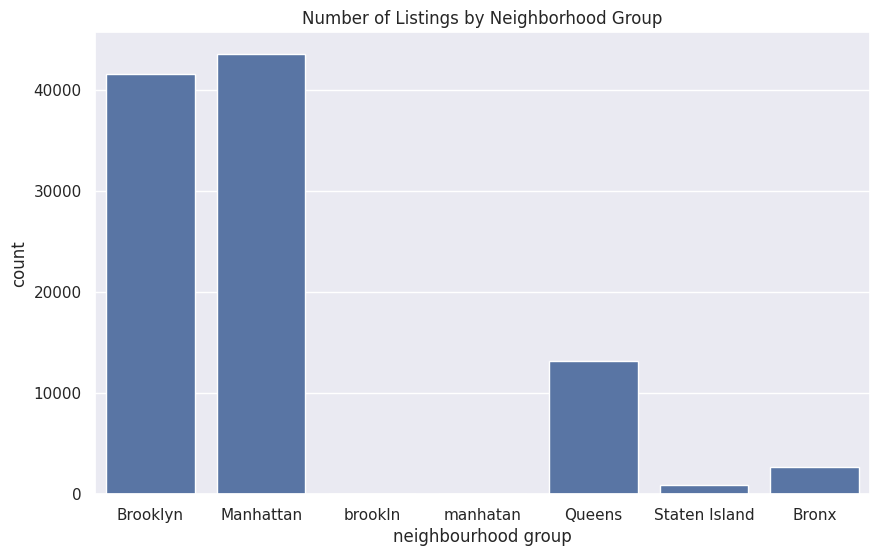

In [ ]:
# Set the visual style
sns.set(style="darkgrid")

# Create the figure
plt.figure(figsize=(10, 6))

# --- Create the plot ---
# Use the correct column name 'neighbourhood group' (with a space)
sns.countplot(x='neighbourhood group', data=df)

# Add a title to the plot
plt.title('Number of Listings by Neighborhood Group')

# Display the plot
plt.show()

QUES 2). What are the most common room types?

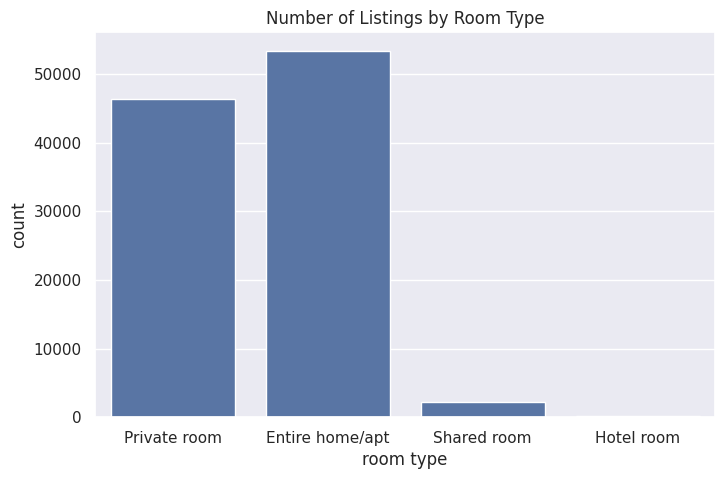

In [ ]:
# Create a new figure
plt.figure(figsize=(8, 5))

# --- Create the plot ---
# We use the correct column name 'room type' (with a space)
sns.countplot(x='room type', data=df)

# Add a title
plt.title('Number of Listings by Room Type')

# Display the plot
plt.show()

QUES 3). What is the price distribution?

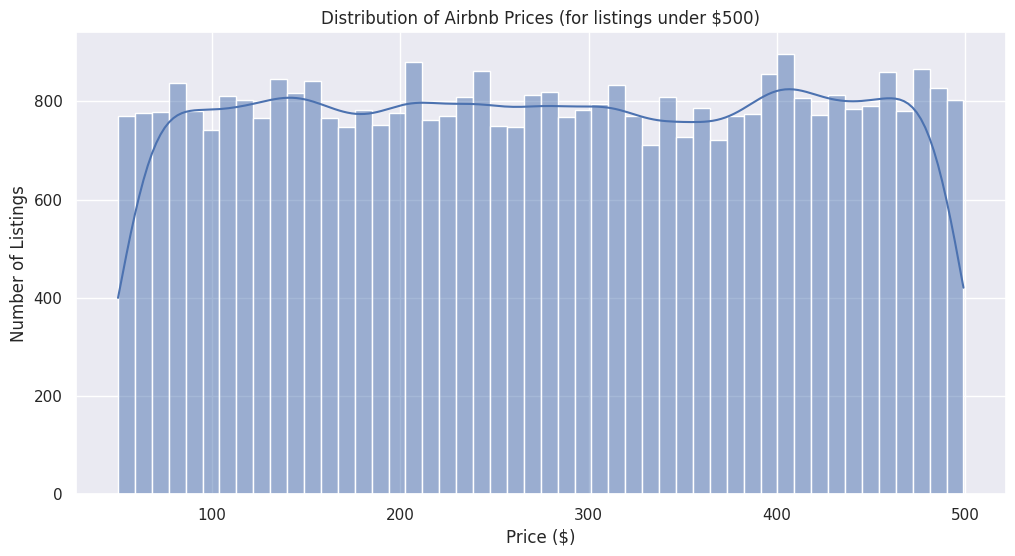

In [ ]:
# 1. Filter out extreme prices for a better plot
#    We'll focus on listings under $500
df_under_500 = df[df['price'] < 500]

# 2. Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_under_500['price'], bins=50, kde=True)
# 'bins=50' means we want 50 bars
# 'kde=True' adds a smooth line over the bars

# 3. Add titles and labels
plt.title('Distribution of Airbnb Prices (for listings under $500)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')

# 4. Display the plot
plt.show()

QUES 4).How do prices compare across different neighborhood groups?

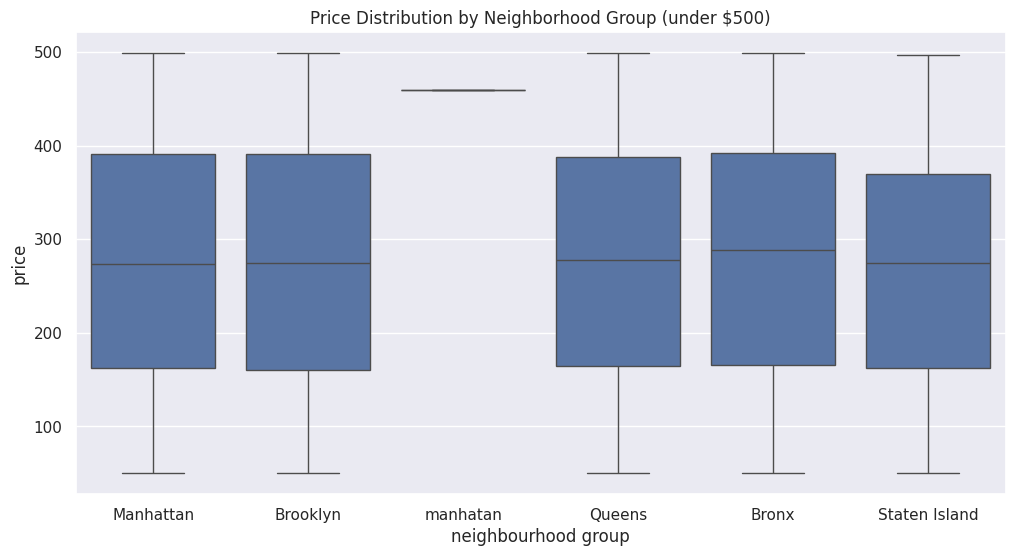

In [ ]:
# Create a new figure
plt.figure(figsize=(12, 6))

# --- Create the plot ---
# We use the 'df_under_500' data to keep the plot clean
# X-axis: 'neighbourhood group'
# Y-axis: 'price'
sns.boxplot(x='neighbourhood group', y='price', data=df_under_500)

# Add a title
plt.title('Price Distribution by Neighborhood Group (under $500)')

# Display the plot
plt.show()

Question 5: What is the availability of listings across the city?

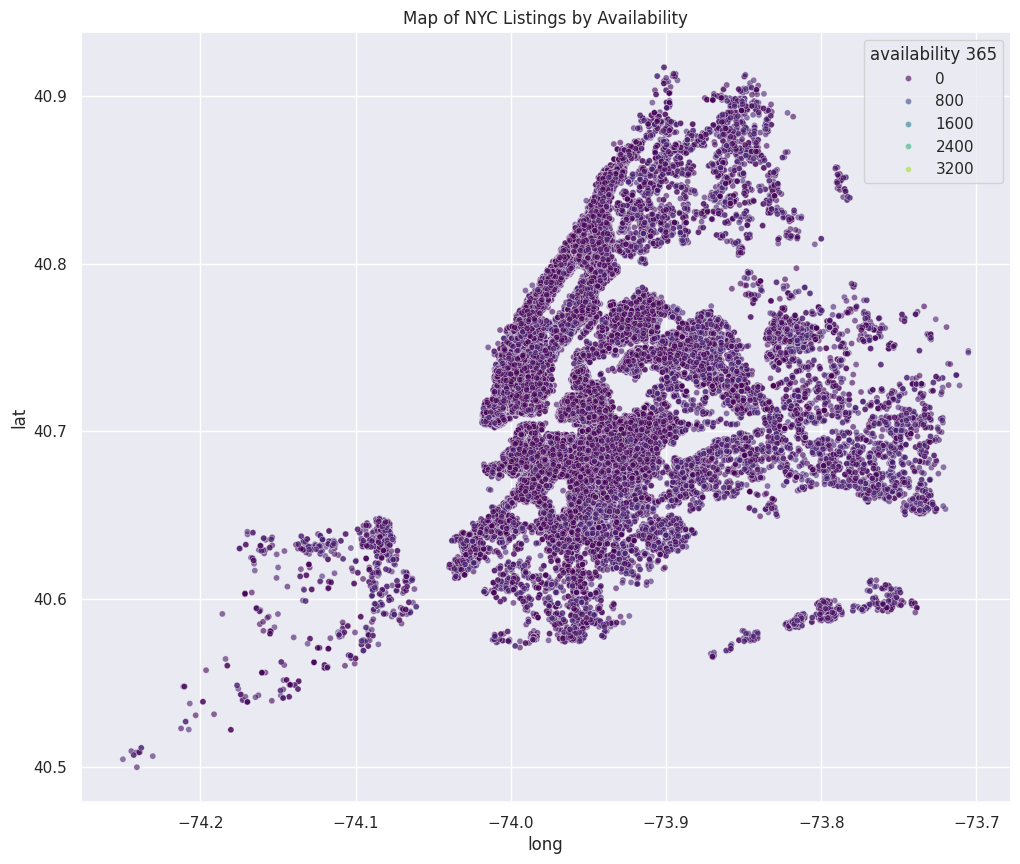

In [ ]:
# Create a large figure to see the map clearly
plt.figure(figsize=(12, 10))

# --- Create the scatter plot ---
# X-axis: 'long' (for longitude)
# Y-axis: 'lat' (for latitude)
# 'hue' will color the dots based on 'availability 365'
# 'palette' is the color scheme
# 's=20' sets the dot size
# 'alpha=0.6' makes the dots slightly transparent
sns.scatterplot(
    x='long',
    y='lat',
    data=df,
    hue='availability 365',
    palette='viridis',
    s=20,
    alpha=0.6
)

# Add a title
plt.title('Map of NYC Listings by Availability')

# Display the plot
plt.show()